# Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. It has been used extensively throughout the Data Science World to benchmark algorithms.

# The Data

| Column | Description |
|--------|-------------|
| crim | per capita crime rate by town. |
| zn | proportion of residential land zoned for lots over 25,000 sq.ft. |
| indus | proportion of non-retail business acres per town. |
| chas | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). |
| nox | nitrogen oxides concentration (parts per 10 million). |
| rm | average number of rooms per dwelling. |
| age | proportion of owner-occupied units built prior to 1940. |
| dis | weighted mean of distances to five Boston employment centres. |
| rad | index of accessibility to radial highways. |
| tax | full-value property-tax rate per \$10,000. |
| ptratio | pupil-teacher ratio by town. |
| black | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town. |
| lstat | lower status of the population (percent). |
| medv | median value of owner-occupied homes in \$1000s. **This is the target variable.** |

The target of this Assignment is to be able to predict the target variable (Median house value), given the other input variables.

# Thoughts

Some ideas/thoughts to help you with the exercise:

1. What ML task is this? Classification? Regression? Clustering?
2. What kind of models would be best to accomplish this?
3. How would you maximize performance of the models that you evaluate for this task?
4. How much is the cost of this model? (Time and compute cost)
5. Which model gives the best RoI (Return on Investment)?

# End Objective

Can you discover a model that performs this prediction task with a score of over 0.9?

# All the best!

Get started below..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

c:\users\vaibh\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)

In [6]:
df_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
df_x.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [8]:
df_x['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [9]:
df_y = pd.DataFrame(boston.target, columns = ['medv'])

In [10]:
df_y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [11]:
df_y.isna().sum()

medv    0
dtype: int64

In [12]:
df = df_x.join(df_y)

In [13]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
medv       0
dtype: int64

In [49]:
df.corr()['medv']
# No columns were dropped here because all the columns here seem to have an impact on the medv label. 

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
medv       1.000000
Name: medv, dtype: float64

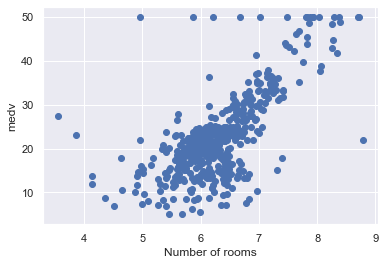

In [17]:
plt.scatter(x = df['RM'], y = df['medv'])
plt.xlabel("Number of rooms")
plt.ylabel("medv")
plt.show()

Number of Rooms seem to have a direct impact on the medv of the house. 

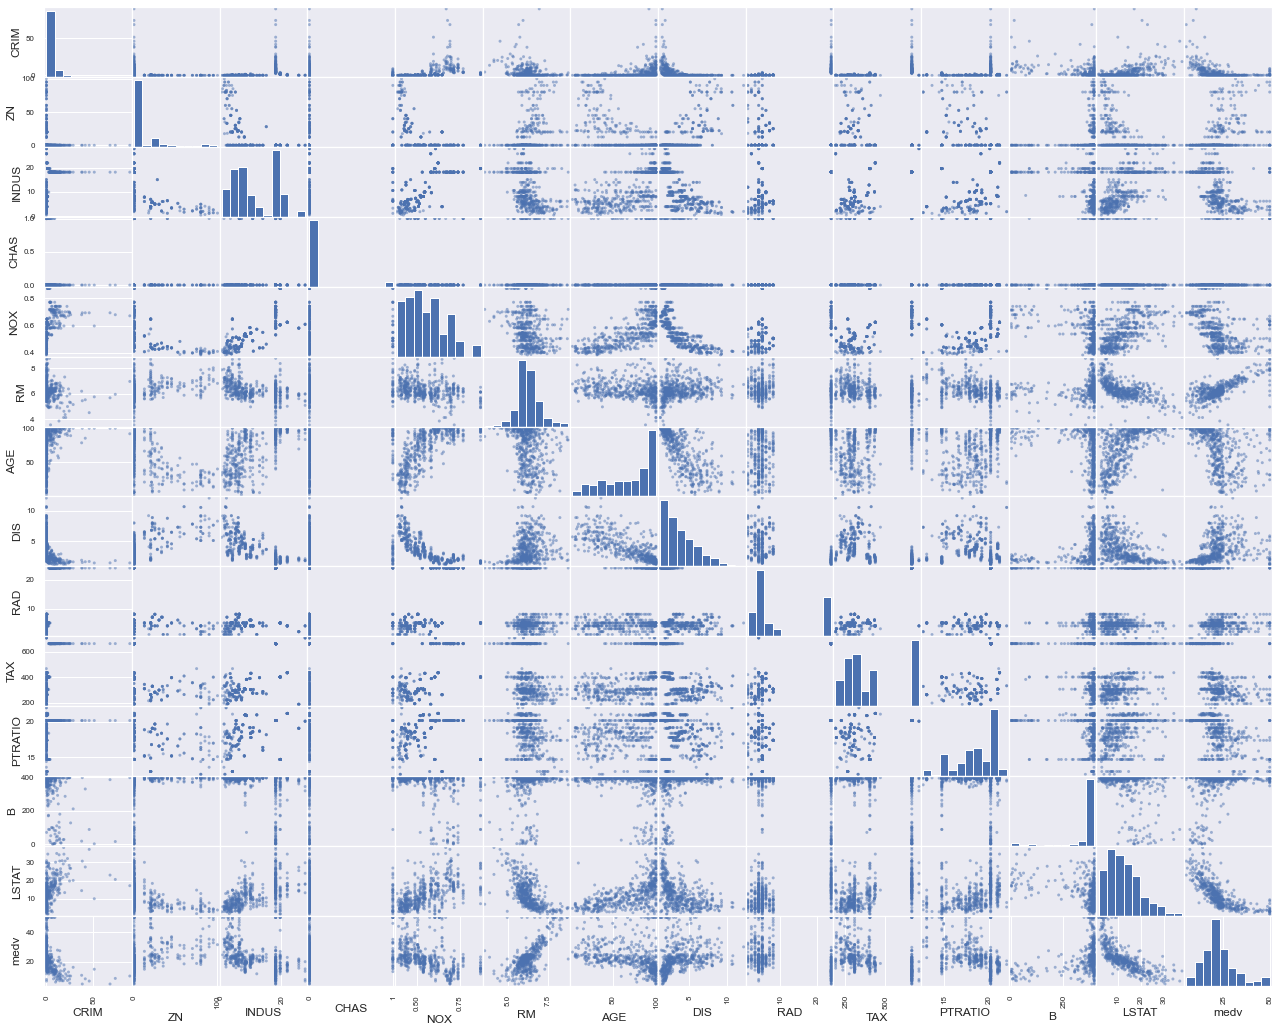

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(22, 18))
plt.show()

In [50]:
#plt.subplot(1, 2, 1)
#plt.scatter(x = df['RM'], y = df['medv'])
#plt.subplot(1, 2, 2)
#plt.scatter(x = df['AGE'], y = df['medv'])
#plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [52]:
X = df.iloc[:, :-1]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [53]:
y = df.iloc[:, -1]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

All the features seem to be related to the target variable medv. This is a regression problem as we are predicting price here. <br>

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle = True)

# Linear Regression

In [27]:
y_pred_lr = []
def linear_regression(X_train, X_test, y_train, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    return lr.score(X_test, y_test)

In [28]:
linear_regression(X_train, X_test, y_train, y_test)

0.783629538507627

In [29]:
%timeit linear_regression

13 ns ± 0.16 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


# Support Vector Regressor

In [30]:
def SV_regression(X_train, X_test, y_train, y_test):
    svr = SVR()
    svr.fit(X_train, y_train)
    return svr.score(X_test, y_test)

In [31]:
SV_regression(X_train, X_test, y_train, y_test)

0.1834631349928726

In [32]:
%timeit SV_regression

12.9 ns ± 0.153 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [41]:
# Poly
def SV_regression_poly(X_train, X_test, y_train, y_test):
    svr_poly = SVR(kernel = 'poly', degree = 2, C = 100, epsilon = 5)
    svr_poly.fit(X_train, y_train)
    return svr_poly.score(X_test, y_test)

In [42]:
SV_regression_poly(X_train, X_test, y_train, y_test)

0.4415115924284526

In [43]:
%timeit SV_regression_poly

12.6 ns ± 0.0532 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


with default parameters, Linear Regression seems to be performing better as compared to SVR model. 

In [46]:
def SV_regression_linear(X_train, X_test, y_train, y_test):
    svr_lr = SVR(kernel = 'linear')
    svr_lr.fit(X_train, y_train)
    return svr_lr.score(X_test, y_test)

In [47]:
SV_regression_linear(X_train, X_test, y_train, y_test)


0.7846664154589142

In [48]:
%timeit SV_regression_linear

10.7 ns ± 0.175 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


The Linear kernel Model in SVR Seems to be giving us a better performance as compared to the default model (rbf)

# GRID SEARCH LINEAR REGRESSOR

In [33]:
from sklearn.model_selection import GridSearchCV

In [38]:
gs_lr = GridSearchCV(SVR(kernel='linear'), dict(C=[0.1,1,10,100],
                                             epsilon=np.arange(0,5,0.5)))


In [39]:
gs_lr.fit(X_train, y_train)

GridSearchCV(estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])})

In [41]:
svc_lr = gs_lr.best_estimator_

In [42]:
svc_lr

SVR(C=10, epsilon=4.5, kernel='linear')

In [43]:
svc_lr.score(X_test, y_test)

0.7926310550325442

In [63]:
# Fine tuning model
gs_lr = GridSearchCV(SVR(kernel='linear'), dict(C=np.arange(2, 10),
                                             epsilon=np.arange(4,5,0.1)))

In [64]:
gs_lr.fit(X_train, y_train)

GridSearchCV(estimator=SVR(kernel='linear'),
             param_grid={'C': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'epsilon': array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])})

In [65]:
svc_lr = gs_lr.best_estimator_

In [66]:
svc_lr.score(X_test, y_test)

0.7964269305085101

In [67]:
svc_lr

SVR(C=9, epsilon=4.299999999999999, kernel='linear')

In [114]:
# Grid search on poly. 

In [109]:
gs_poly = GridSearchCV(SVR(kernel='poly', degree = 2), dict(C=[0.1,1,10,100],
                                             epsilon=np.arange(0,5,0.5)))

In [110]:
gs_poly.fit(X_train, y_train)

GridSearchCV(estimator=SVR(degree=2, kernel='poly'),
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])})

In [111]:
svr_poly = gs_poly.best_estimator_

In [112]:
svr_poly

SVR(C=100, degree=2, epsilon=2.5, kernel='poly')

In [113]:
svr_poly.score(X_test, y_test)

0.4314784391009313

# Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
def random_regressor(X_train, X_test, y_train, y_test):
    model_RFR = RandomForestRegressor()
    model_RFR.fit(X_train, y_train)
    return model_RFR.score(X_test, y_test)

In [37]:
 random_regressor(X_train, X_test, y_train, y_test)

0.9098661773785384

In [38]:
%timeit random_regressor

10.6 ns ± 0.0165 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


# OBSERVATIONS

The random forest regressor seems to provide a balance between computation time and performance.

The results from different models have been listed below without grid search. <br>

| Model | Computation Time | Accuracy |
| --- | --- | --- |
| Linear Regression | 13.3nS | 0.783 |
| SVR_default(rbf) | 12.9 nS | 0.183 |
| SVR_poly | 12.6nS  | 0.44 |
| SVR_Linear | 10.7nS  | 0.784 |
| RandomForest Regressor | 10.6nS | 0.91 |



| Model (Grid Search) | Accuracy |
| --- | --- |
| SVR_linear | 0.796 |
| SVR_poly |  0.43 |
| RandomForest Regressor |  0.91 |

The Random Forest Regressor seems to provide the highest return on investment in terms of computation cost and performance performing better than all the other models by a margin and taking almost the same amount of computation time. 
Random Forest Regressor even performs better than SVR even after using grid search. <br>

The timing on Grid search has not been timed because in general grid search was taking too long and wasnt giving the desired score. 